<a href="https://colab.research.google.com/github/chinmayrozekar/PGPAIML_UT_Austin/blob/main/Personal%20Loan%20Campaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author : Chinmay Rozekar

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
)

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df= pd.read_csv('/content/drive/MyDrive/PGP-AIML UT AUSTIN/Loan_Modelling.csv')

In [ ]:
data = df.copy()

Making copy of the data

## Data Overview

* Observations
* Sanity checks

In [ ]:
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
data.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [ ]:
data.shape

(5000, 14)

The dataset contains **5,000 rows** and **14 columns**.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


The dataset consists of 5,000 entries (rows) and 14 columns (features).

All columns are complete with no missing values. Among them:

13 columns are of data type integer (int64), and

1 column, CCAvg, is of type float (float64).

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


Here are the key observations from the descriptive statistics:

- The average customer is **45 years old**, with **20 years of experience**, although there are **some negative experience values**, indicating possible data issues.
- The **mean income** is approximately **$73.77K**, with a **maximum of $224K**, suggesting a wide income range and possible high-income outliers.
- **Credit card average spend (CCAvg)** has a median of **$1.5K/month**, but values go up to **$10K**, again showing a right-skewed distribution.
- **Mortgage values** are heavily skewed — **50% of customers have $0**, but the maximum reaches **$635K**, suggesting that many customers don’t have a mortgage, while a few have very large ones.
- The target variable `Personal_Loan` shows **only 9.6% of customers accepted a loan**, indicating a **class imbalance**.
- Binary features such as `Securities_Account`, `CD_Account`, and `CreditCard` also show **low means**, confirming that **most customers do not hold these accounts**.
- Education is encoded from 1 to 3, with a majority having **undergraduate or graduate-level education**.

In [ ]:
data.isnull().sum()

,0
ID,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0


No Null values

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

**Univariate Analysis**

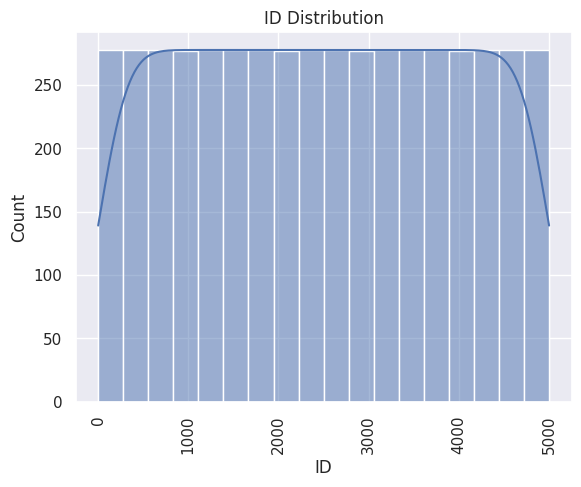

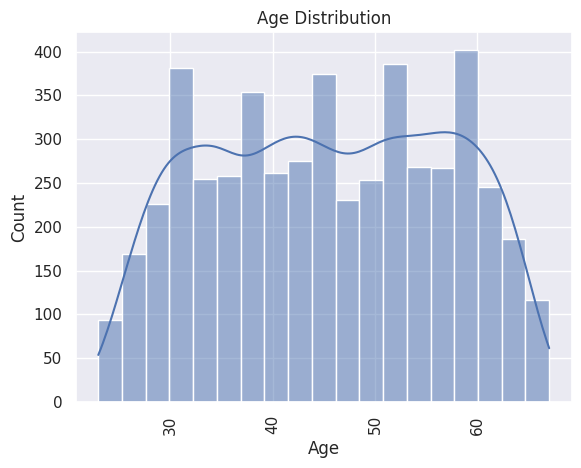

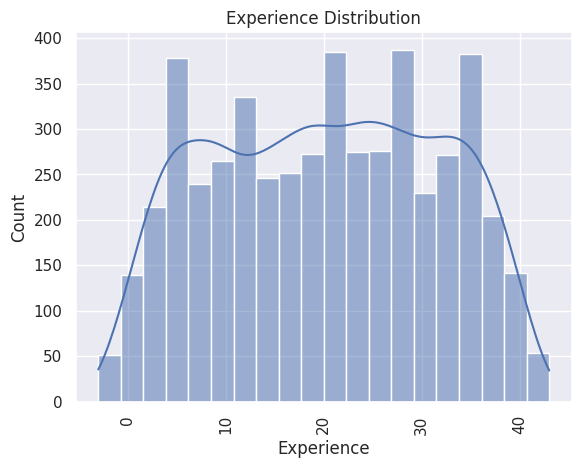

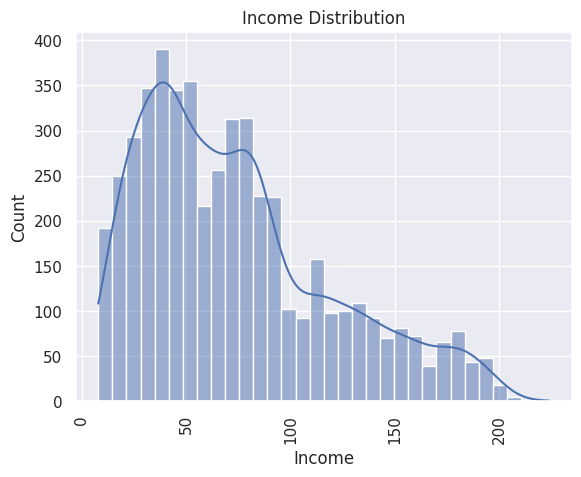

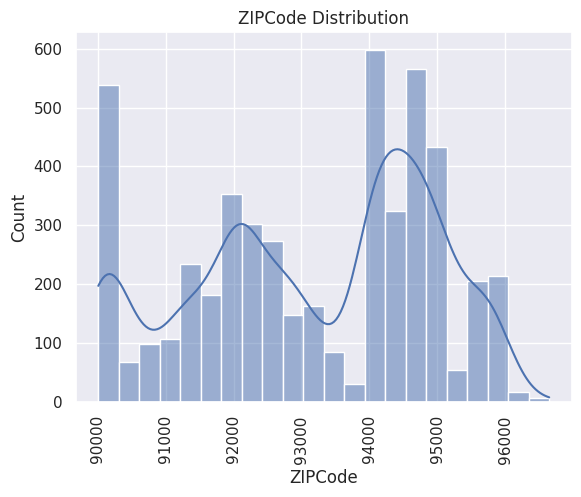

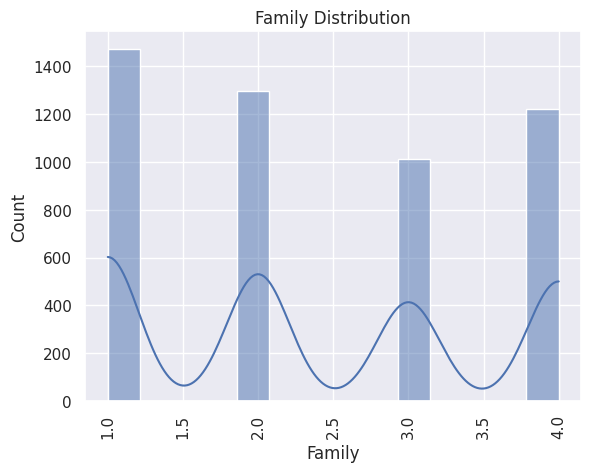

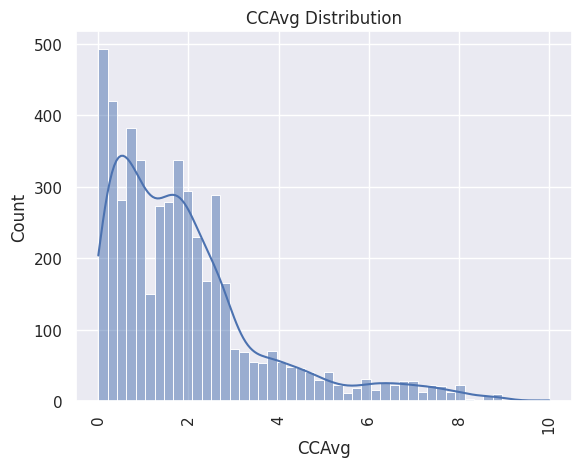

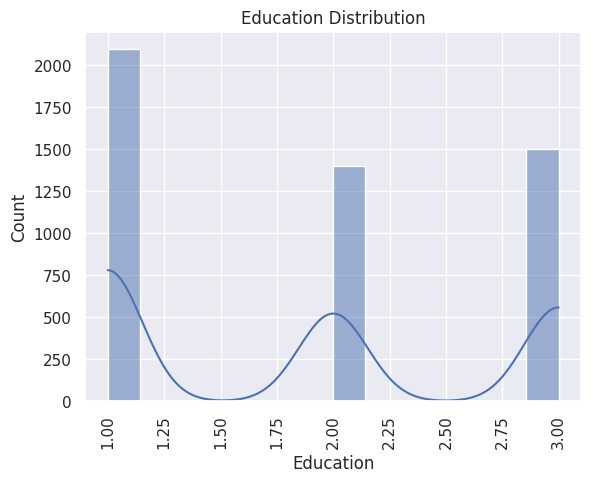

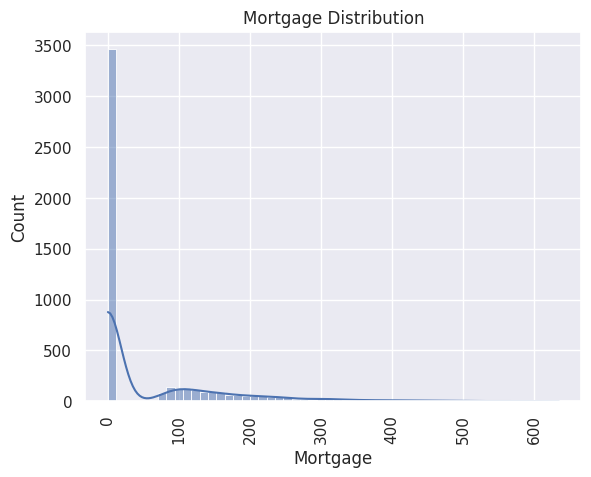

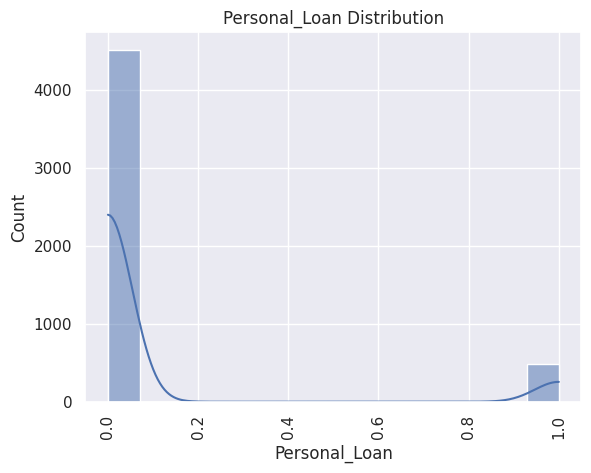

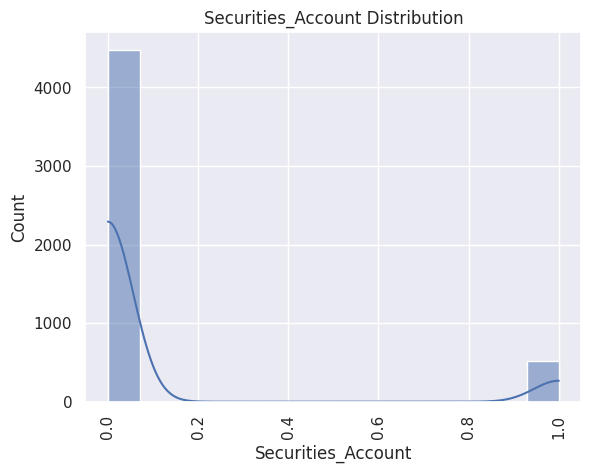

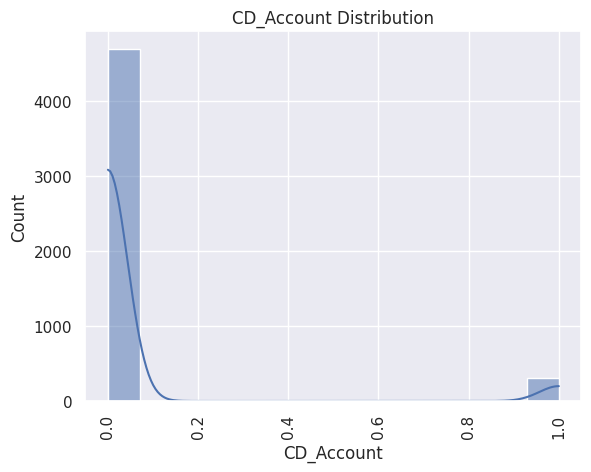

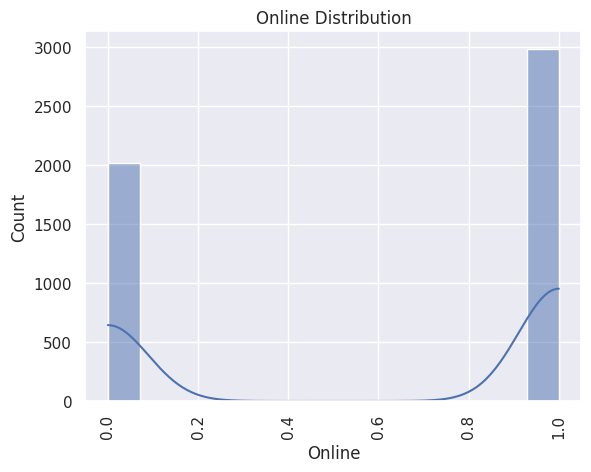

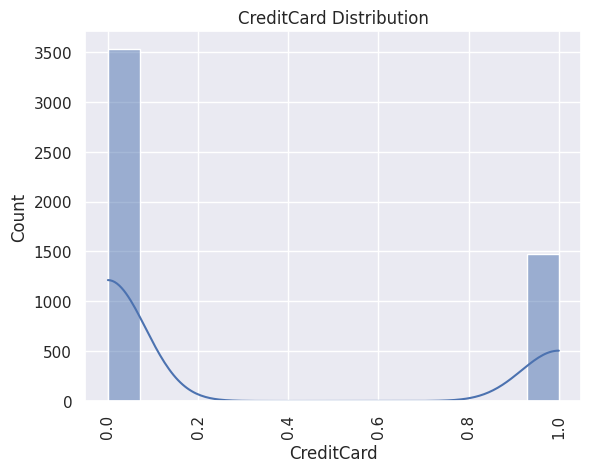

In [ ]:
cols_num= data.select_dtypes(['float64','int64'])

for i in cols_num.columns:
    sns.histplot(data=data,x=i,kde=True)
    plt.title(f'{i} Distribution')
    plt.xticks(rotation=90)
    plt.show()

- Age and Experience distributions are roughly normal but shifted slightly left; Experience shows outliers (e.g., negative values).
- Income is right-skewed with a long tail, suggesting a few high-income individuals.
- CCAvg (Credit Card Average) also exhibits a strong right skew, with most customers spending less than $5k/month.
- Mortgage has a sharp spike at 0, indicating many customers have no mortgage.
- Binary variables (Personal_Loan, Securities_Account, CD_Account, Online, CreditCard) show two clear spikes (0 and 1) as expected.
- Education and Family are categorical with limited unique values, forming stepped distributions.
- ZIPCode and ID appear uniformly distributed, offering little predictive value for modeling.
- Personal_Loan is highly imbalanced, with a majority of values being 0.

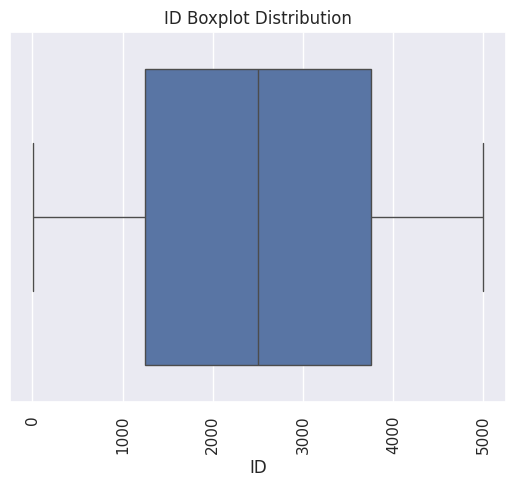

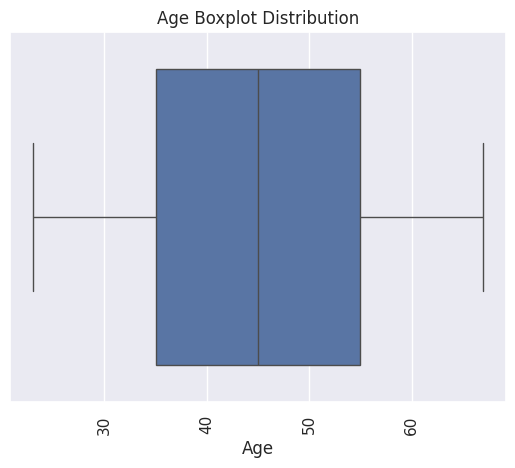

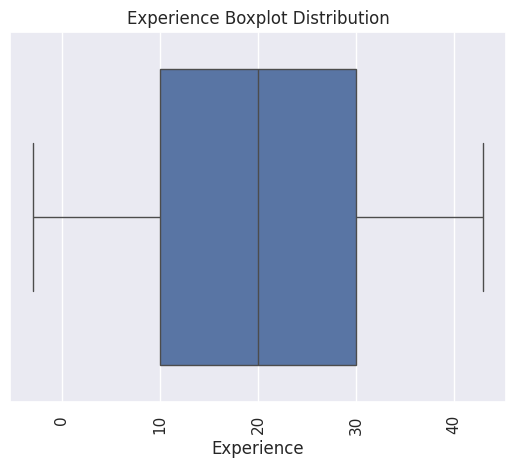

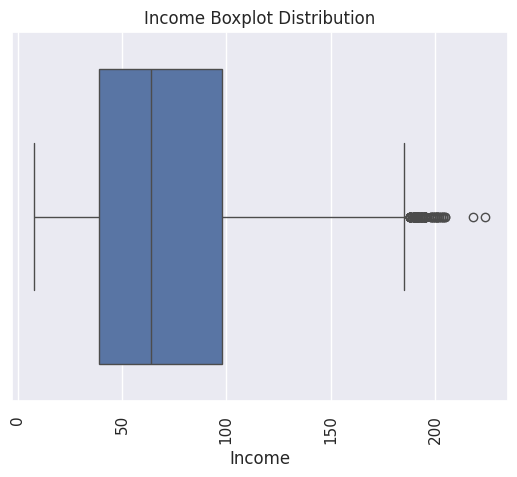

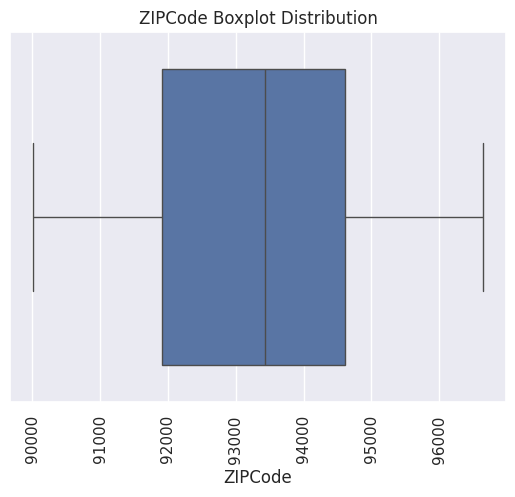

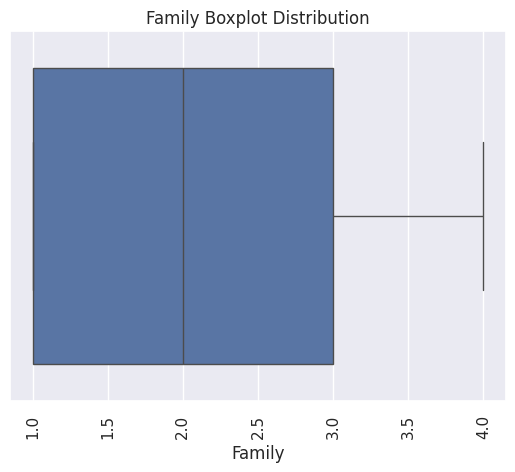

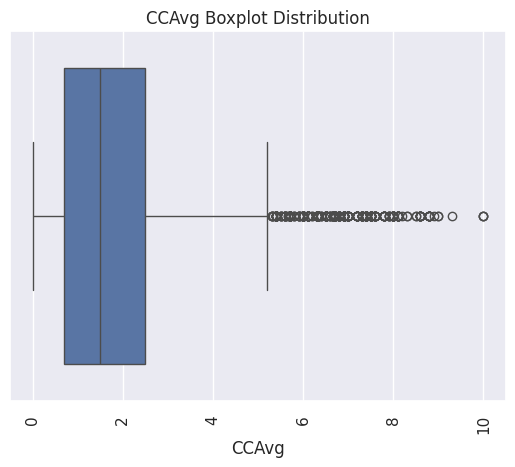

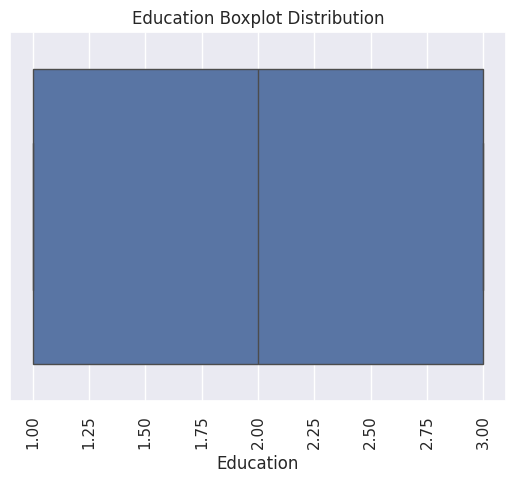

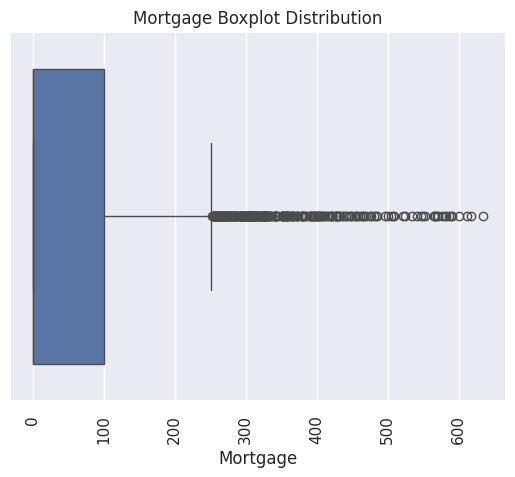

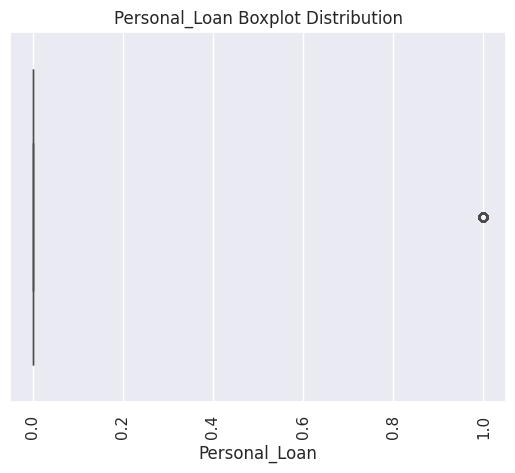

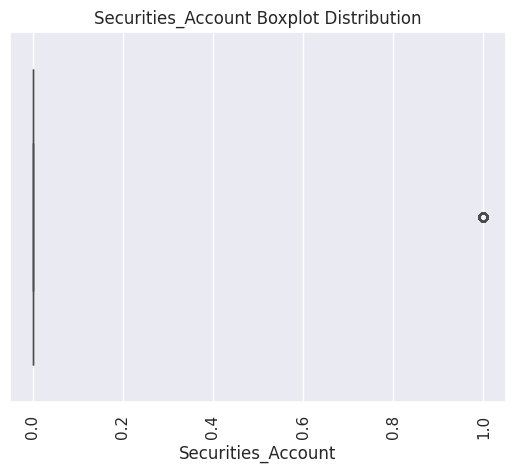

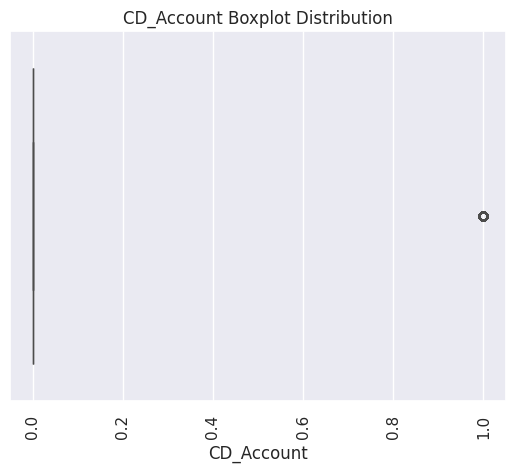

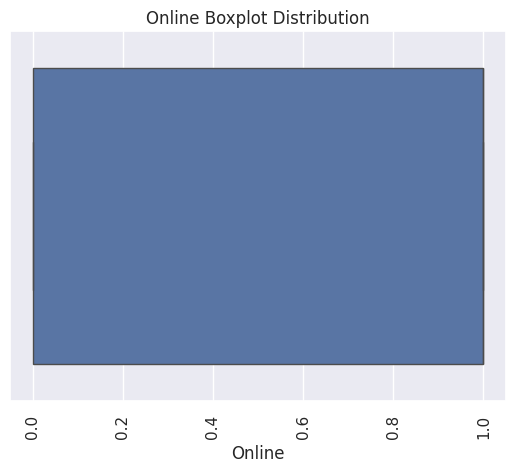

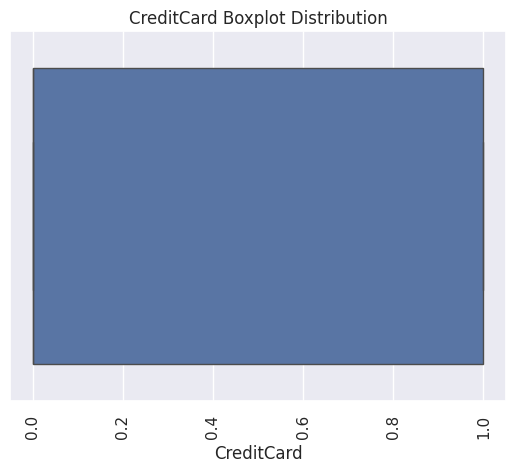

In [ ]:
for i in cols_num.columns:
  sns.boxplot(data=data,x=i)
  plt.title(f'{i} Boxplot Distribution')
  plt.xticks(rotation=90)
  plt.show()

- Experience includes negative values, which are outliers and likely data entry errors.
- Income, CCAvg, and Mortgage have significant outliers on the higher end, indicating a few customers with exceptionally high values.
- Family and Education have discrete steps and no true outliers due to their categorical nature.
- Binary columns (Personal_Loan, Securities_Account, CD_Account, Online, CreditCard) show only two values and are not suited for outlier analysis.
- Age shows a fairly symmetric distribution with a few mild outliers on either end.
- ZIPCode and ID are uniformly spread and don't present meaningful outliers, supporting the idea that they may not hold predictive value.

**Bivariate Analysis**

Count of 0 mortgage: 3462
Count of non-zero mortgage: 1538


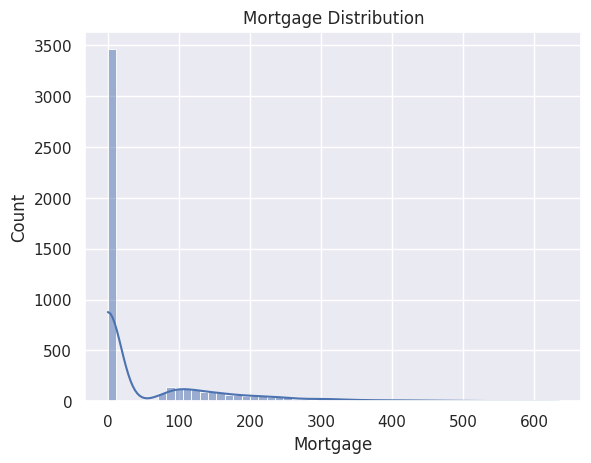

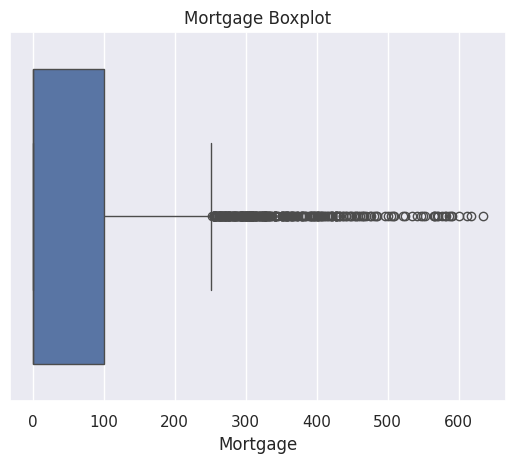

In [ ]:
# What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?


# Count how many people have 0 mortgage
print("Count of 0 mortgage:", (data['Mortgage'] == 0).sum())
print("Count of non-zero mortgage:", (data['Mortgage'] != 0).sum())

# Plot histogram
sns.histplot(data['Mortgage'], kde=True)
plt.title('Mortgage Distribution')
plt.show()

# Plot boxplot
sns.boxplot(x=data['Mortgage'])
plt.title('Mortgage Boxplot')
plt.show()

This visualization shows that the Mortgage attribute is heavily concentrated at 0 with a long tail extending to high values, confirming the presence of right skewness and multiple outliers on the higher end.

1470


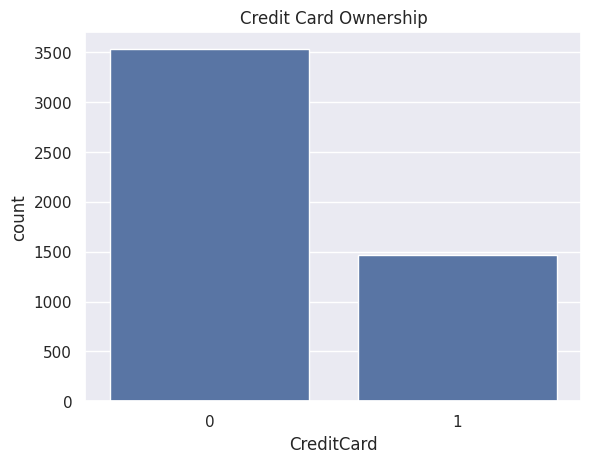

In [ ]:
credit_card_holders = data[data['CreditCard'] == 1]
print(credit_card_holders.shape[0])

sns.countplot(data=data,x='CreditCard')
plt.title('Credit Card Ownership')
plt.show()

1,470 customers in the dataset have credit cards.

Correlation with Personal_Loan:

Personal_Loan         1.000000
Income                0.502462
CCAvg                 0.366889
CD_Account            0.316355
Mortgage              0.142095
Education             0.136722
Family                0.061367
Securities_Account    0.021954
Online                0.006278
CreditCard            0.002802
ZIPCode              -0.002974
Experience           -0.007413
Age                  -0.007726
ID                   -0.024801
Name: Personal_Loan, dtype: float64


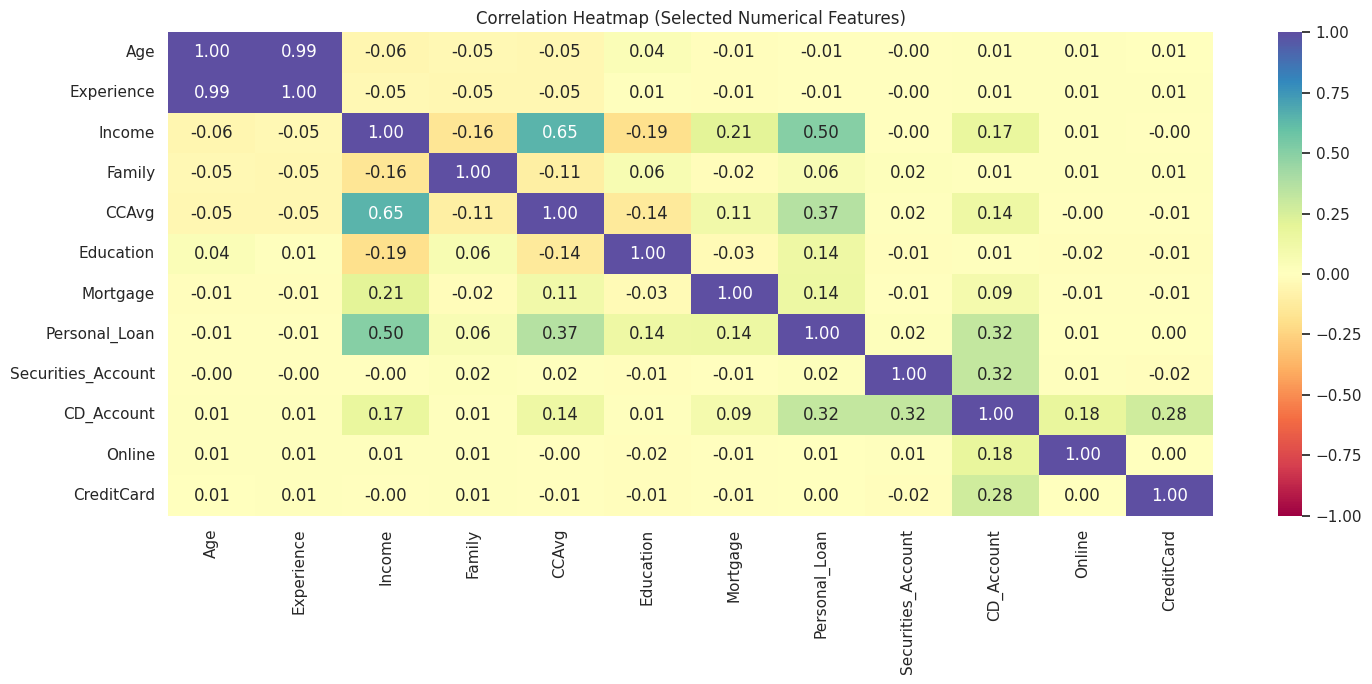

In [ ]:
# What are the attributes that have a strong correlation with the target attribute (personal loan)?


correlations = data.corr(numeric_only=True)['Personal_Loan'].sort_values(ascending=False)
print("Correlation with Personal_Loan:\n")
print(correlations)

# Get list of numeric columns
cols_list = data.select_dtypes(include=np.number).columns.tolist()

# Remove non-informative columns
cols_list.remove("ID")        # ID is just an identifier
cols_list.remove("ZIPCode")   # ZIP code may not be useful for correlation

# Plot the heatmap for selected numerical features
plt.figure(figsize=(15, 7))
sns.heatmap(data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.title("Correlation Heatmap (Selected Numerical Features)")
plt.tight_layout()
plt.show()


- Income, CCAvg, and CD_Account show the strongest positive correlation with Personal_Loan, indicating they are key factors influencing loan acceptance.

- Other features like Age, Experience, and ZIPCode have little to no correlation, making them less relevant for predicting loan decisions.

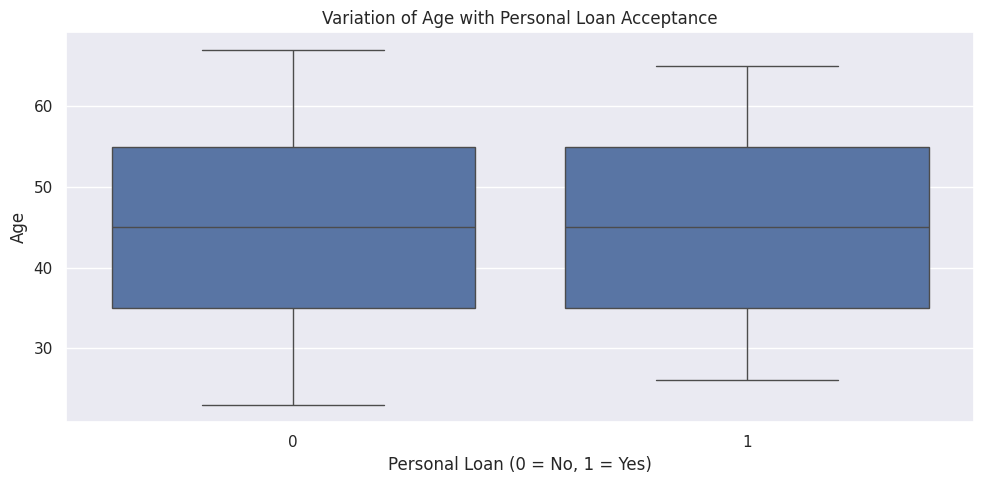

In [ ]:
# How does a customer's interest in purchasing a loan vary with their age?

plt.figure(figsize=(10, 5))
sns.boxplot(x=data['Personal_Loan'], y=data['Age'])
plt.title("Variation of Age with Personal Loan Acceptance")
plt.xlabel("Personal Loan (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.tight_layout()
plt.show()

However,the overall age ranges overlap significantly, indicating that age alone is not a strong predictor of loan acceptance.

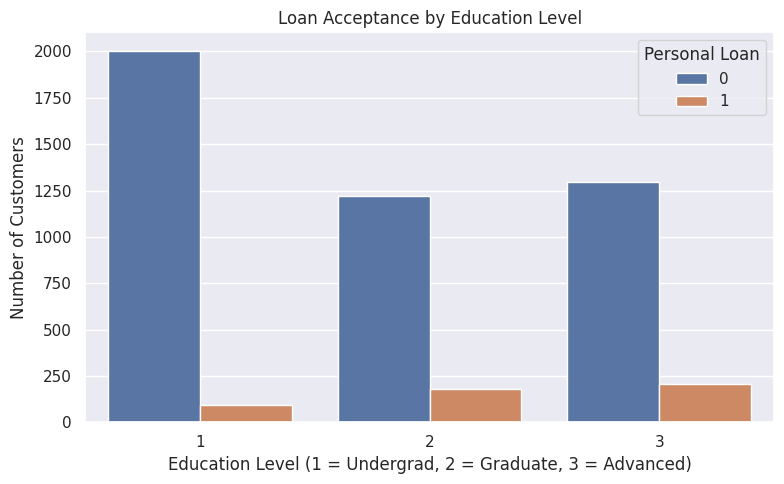

In [ ]:
# How does a customer's interest in purchasing a loan vary with their education?

plt.figure(figsize=(8, 5))
sns.countplot(x='Education', hue='Personal_Loan', data=data)
plt.title('Loan Acceptance by Education Level')
plt.xlabel('Education Level (1 = Undergrad, 2 = Graduate, 3 = Advanced)')
plt.ylabel('Number of Customers')
plt.legend(title='Personal Loan')
plt.tight_layout()
plt.show()

- Customers with higher education levels (Graduate and Advanced) are more likely to accept personal loans compared to those with only undergraduate education.
- The lowest loan acceptance is observed among customers with undergraduate education (Level 1).

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [ ]:
# Missing value treatment

data.isnull().sum()

,0
ID,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0


No missing values

In [ ]:
# Feature engineering (if needed)

data.drop('ID',axis=1,inplace=True)

ID is just an identifier. Hence droped

**Outlier detection and treatment (if needed)**

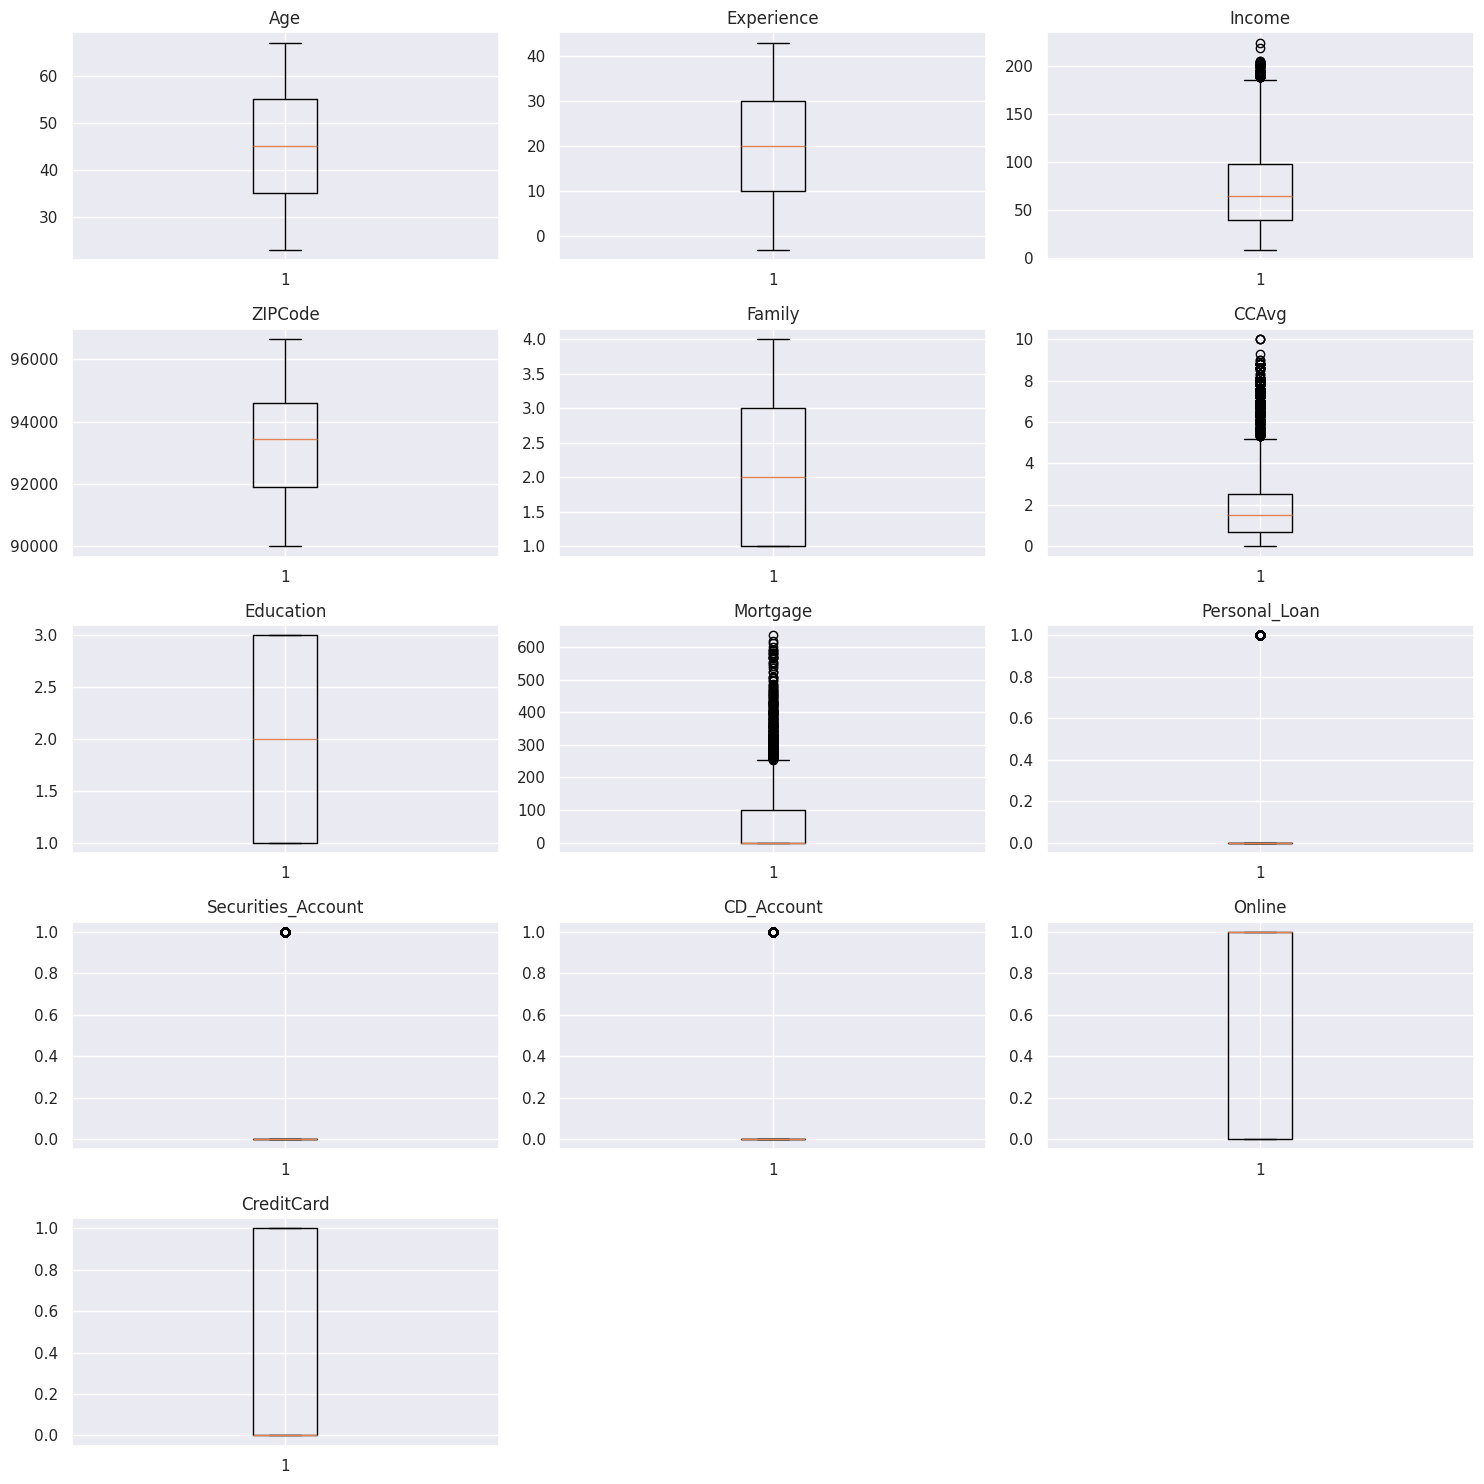

In [ ]:
# Get numeric columns
cols_list = data.select_dtypes(include='number').columns.tolist()
cols_list

numeric_columns = ['Age','Experience','Income','ZIPCode','Family','CCAvg','Education','Mortgage','Personal_Loan','Securities_Account','CD_Account','Online','CreditCard']

plt.figure(figsize=(15,15))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 3, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- Income, CCAvg, and Mortgage have clear high-end outliers, showing a few customers with unusually large values.
- Experience has outliers on the lower side, including negative values, which likely indicate data errors.
- Binary variables like Personal_Loan, Online, etc., do not have outliers since they only contain 0s and 1s.

In [ ]:
# to find the 25th percentile and 75th percentile for the numerical columns.

Q1 = data[numeric_columns].quantile(0.25)
Q3 = data[numeric_columns].quantile(0.75)

IQR = Q3 - Q1                   #Inter Quantile Range (75th percentile - 25th percentile)

lower_whisker = Q1 - 1.5*IQR    #Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper_whisker = Q3 + 1.5*IQR

In [ ]:
# Identifying outliers

# Percentage of outliers in each column
((data[numeric_columns] < lower_whisker) | (data[numeric_columns] > upper_whisker)).sum()/data.shape[0]*100

,0
Age,0.00
Experience,0.00
Income,1.92
ZIPCode,0.00
Family,0.00
CCAvg,6.48
Education,0.00
Mortgage,5.82
Personal_Loan,9.60
Securities_Account,10.44


- The highest outlier percentages are in Securities_Account (10.44%), Personal_Loan (9.60%), and CCAvg (6.48%), indicating some deviation from typical values.
- Columns like Age, Experience, ZIPCode, Family, Education, Online, and CreditCard show no outliers using the IQR method.
- Since the outliers are relatively few and may represent valid extreme customer behaviors, it's okay to keep them

**Data Preparation for Modeling**

In [ ]:
# dropping Experience as it is perfectly correlated with Age
X = data.drop(["Personal_Loan", "Experience"], axis=1)
y = data["Personal_Loan"]

X = pd.get_dummies(X, columns=["ZIPCode", "Education"], drop_first=True)

X = X.astype(float)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 477)
Shape of test set :  (1500, 477)
Percentage of classes in training set:
Personal_Loan
0    0.905429
1    0.094571
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0    0.900667
1    0.099333
Name: proportion, dtype: float64


We observed that around 90.5% of the observations belong to class 0 (Did not accept loan) and 9.5% belong to class 1 (Accepted loan). This class imbalance is preserved in both the training and test sets, ensuring consistency for model evaluation.

## Model Building

### Model Evaluation Criterion

The model can make wrong predictions in two ways:

- Predicting a customer will not accept a loan, but in reality, the customer does accept it (False Negative)
- Predicting a customer will accept a loan, but in reality, they do not (False Positive)

**Which case is more important?**

- If we predict that a customer will not accept the loan but they actually do, the bank misses an opportunity to sell a loan — resulting in loss of potential revenue.
- If we predict that a customer will accept the loan but they don’t, the bank may waste resources on follow-ups or promotions — a comparatively smaller loss.

**How to reduce the losses?**

The bank would prefer to maximize recall — higher recall means fewer False Negatives, increasing the chances of capturing all interested customers and maximizing loan sales.


In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building

**Decision Tree (default)**

In [ ]:
model0 = DecisionTreeClassifier(random_state=1)
model0.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

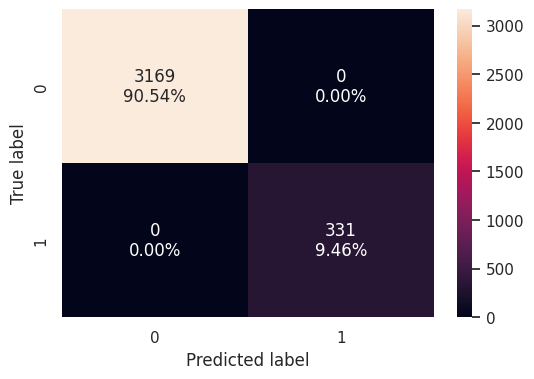

In [ ]:
confusion_matrix_sklearn(model0, X_train, y_train)

In [ ]:
decision_tree_default_perf_train = model_performance_classification_sklearn(
    model0, X_train, y_train
)
decision_tree_default_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


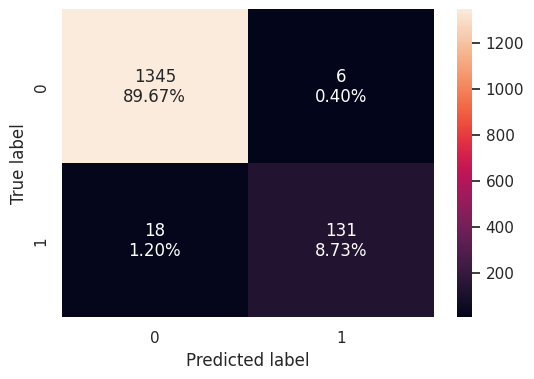

In [ ]:
confusion_matrix_sklearn(model0, X_test, y_test)

In [ ]:
decision_tree_default_perf_test = model_performance_classification_sklearn(
    model0, X_test, y_test
)
decision_tree_default_perf_test

,Accuracy,Recall,Precision,F1
0,0.984,0.879195,0.956204,0.916084


**Decision Tree (with class_weights)**

- If the frequency of class A is 10% and the frequency of
class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes

- In this case, we will set class_weight = "balanced", which will automatically adjust the weights to be inversely proportional to the class frequencies in the input data

- class_weight is a hyperparameter for the decision tree classifier





In [ ]:
model1 = DecisionTreeClassifier(random_state=1, class_weight="balanced")
model1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

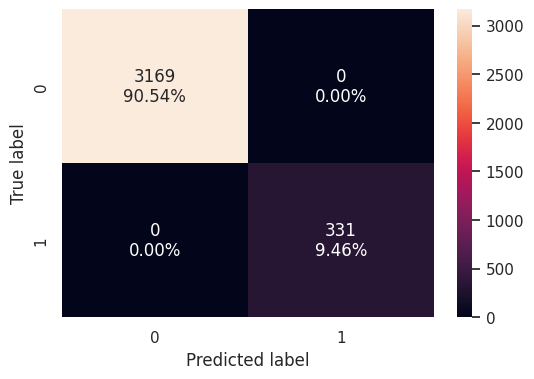

In [ ]:
confusion_matrix_sklearn(model1, X_train, y_train)

In [ ]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model1, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


- The model perfectly classifies all training data with 0 errors, which indicates that the decision tree has learned all patterns in the training set.

- This typically results in overfitting, where the model performs well on training data but may not generalize effectively to unseen test data.

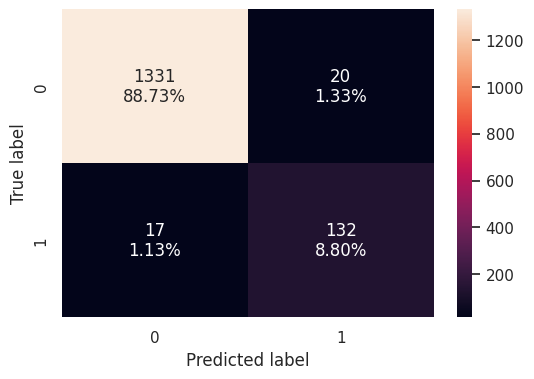

In [ ]:
confusion_matrix_sklearn(model1, X_test, y_test)

In [ ]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model1, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.975333,0.885906,0.868421,0.877076


- The model achieves **perfect scores on the training set**, indicating it has likely **overfit** by memorizing the data.  
- On the test set, there's a **noticeable drop in performance**, confirming that the model's ability to **generalize to new data is limited**.

## Model Performance Improvement

**Decision Tree (Pre-pruning)**

- Hyperparameter tuning is crucial because it directly affects the performance of a model.
- Unlike model parameters which are learned during training, hyperparameters need to be set before training.
- Effective hyperparameter tuning helps in improving the performance and robustness of the model.
- The below custom loop for hyperparameter tuning iterates over predefined parameter values to identify the best model based on the metric of choice (recall score).



In [ ]:
# Define the parameters of the tree to iterate over
max_depth_values = np.arange(2, 7, 2)
max_leaf_nodes_values = [50, 75, 150, 250]
min_samples_split_values = [10, 30, 50, 70]

# Initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')
best_test_score = 0.0

# Iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # Initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                class_weight='balanced',
                random_state=42
            )

            # Fit the model to the training data
            estimator.fit(X_train, y_train)

            # Make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # Calculate recall scores for training and test sets
            train_recall_score = recall_score(y_train, y_train_pred)
            test_recall_score = recall_score(y_test, y_test_pred)

            # Calculate the absolute difference between training and test recall scores
            score_diff = abs(train_recall_score - test_recall_score)

            # Update the best estimator and best score if the current one has a smaller score difference
            if (score_diff < best_score_diff) & (test_recall_score > best_test_score):
                best_score_diff = score_diff
                best_test_score = test_recall_score
                best_estimator = estimator

# Print the best parameters
print("Best parameters found:")
print(f"Max depth: {best_estimator.max_depth}")
print(f"Max leaf nodes: {best_estimator.max_leaf_nodes}")
print(f"Min samples split: {best_estimator.min_samples_split}")
print(f"Best test recall score: {best_test_score}")

Best parameters found:
Max depth: 2
Max leaf nodes: 50
Min samples split: 10
Best test recall score: 1.0


In [ ]:
# creating an instance of the best model
model2 = best_estimator

# fitting the best model to the training data
model2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=np.int64(2),
                       max_leaf_nodes=50, min_samples_split=10,
                       random_state=42)

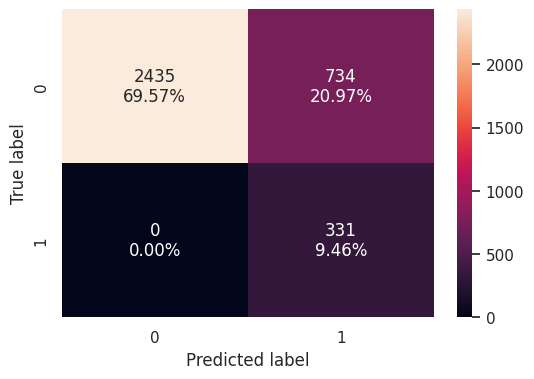

In [ ]:
confusion_matrix_sklearn(model2, X_train, y_train)

In [ ]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    model2, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.790286,1.0,0.310798,0.474212


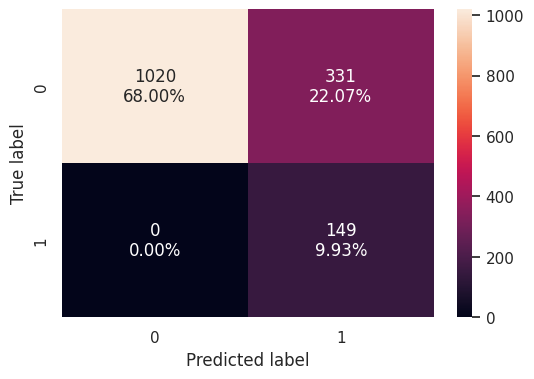

In [ ]:
confusion_matrix_sklearn(model2, X_test, y_test)

In [ ]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    model2, X_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.779333,1.0,0.310417,0.473768


- Accuracy is dropped in Pre prunning as compared to the original tree

In [ ]:
feature_names = list(X_train.columns)
importances = model2.feature_importances_
indices = np.argsort(importances)




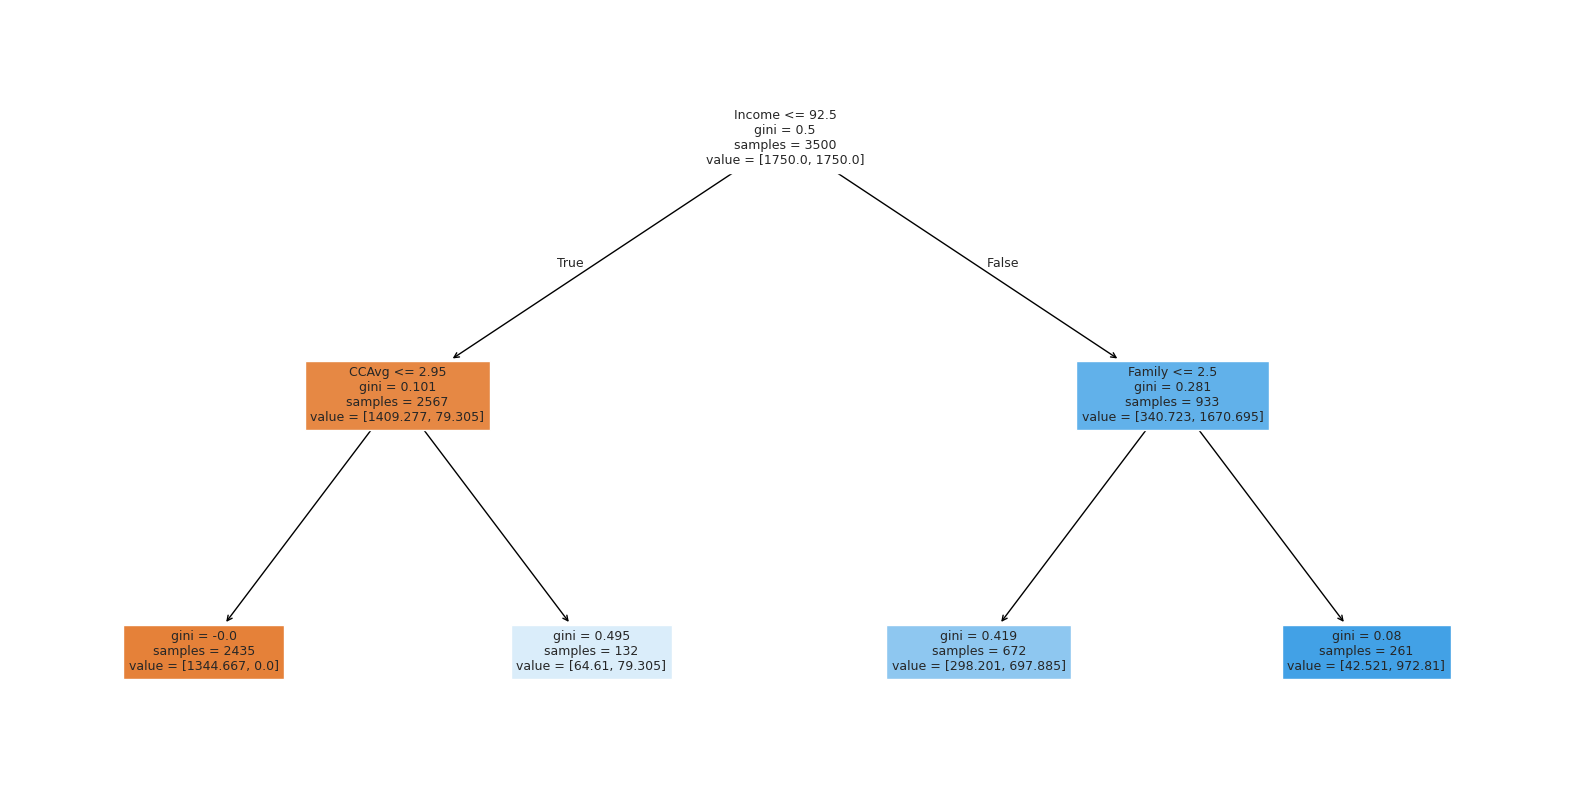

In [ ]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -
print(tree.export_text(model2, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [64.61, 79.31] class: 1
|--- Income >  92.50
|   |--- Family <= 2.50
|   |   |--- weights: [298.20, 697.89] class: 1
|   |--- Family >  2.50
|   |   |--- weights: [42.52, 972.81] class: 1



- If the Income is less than or equal to 92.5 and CCAvg is less than or equal to 2.95, then the customer is most likely not interested in a personal loan (class 0).

- If the Income is greater than 92.5 and Family size is greater than 2.5, then the customer is most likely interested in a personal loan (class 1).

In [ ]:
importances = model2.feature_importances_
importances

array([0.        , 0.87652937, 0.05653065, 0.06693998, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
# Show feature names with importance > 0
feature_importances = pd.Series(importances, index=X.columns)
important_features = feature_importances[feature_importances > 0].sort_values(ascending=False)
print(important_features)


Income    0.876529
CCAvg     0.066940
Family    0.056531
dtype: float64


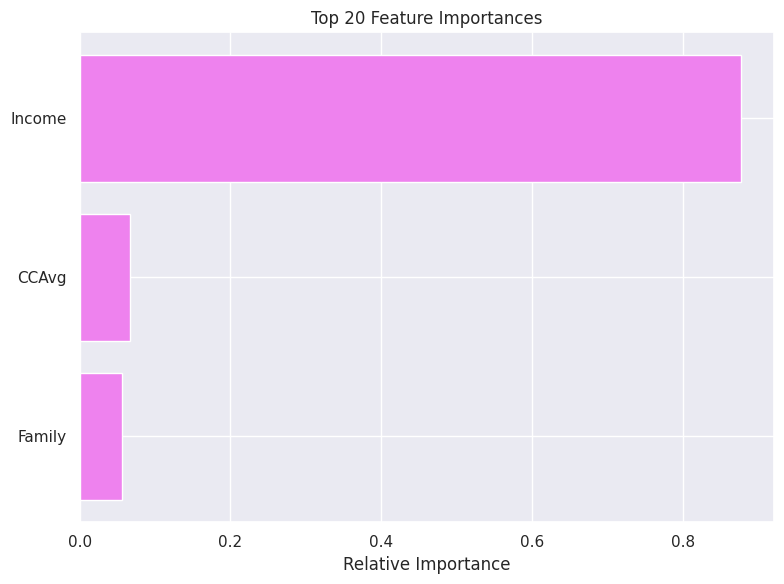

In [ ]:
# Get feature importances as a Series
importances = model2.feature_importances_
feature_importances = pd.Series(importances, index=X.columns)

# Filter and sort top features
top_features = feature_importances[feature_importances > 0].sort_values(ascending=True).tail(20)

# Plot
plt.figure(figsize=(8, 6))
plt.title("Top 20 Feature Importances")
plt.barh(top_features.index, top_features.values, color="violet")
plt.xlabel("Relative Importance")
plt.tight_layout()
plt.show()



- The decision tree model relies heavily on just a few key features, with Income being the most dominant, followed by CCAvg and Family — these are the only features with non-zero importance scores.

- All other features, including many one-hot encoded ZIP codes and education levels, were not used at all in the tree, as their importance values are 0. This means the model found them irrelevant for predicting loan acceptance in this case.

**Decision Tree (Post pruning)**

Cost complexity pruning is a technique in DecisionTreeClassifier that helps control the size of a decision tree using the parameter ccp_alpha.

As ccp_alpha increases, more branches (nodes) are pruned, resulting in a simpler and less overfit tree.

The pruning process starts by removing the weakest links—nodes with the smallest contribution (lowest effective alpha) to the model.

You can use cost_complexity_pruning_path to explore different ccp_alpha values and their impact on leaf impurity, helping you choose the optimal pruning level.



In [ ]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [ ]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,-6.129189e-15
1,5.255079e-19,-6.128663e-15
2,5.255079e-19,-6.128138e-15
3,1.051016e-18,-6.127087e-15
4,1.257806e-17,-6.114509e-15
5,2.857143e-04,8.571429e-04
6,2.887484e-04,3.167130e-03
7,2.891322e-04,5.191056e-03
8,2.998950e-04,6.090741e-03
9,3.049400e-04,7.920381e-03


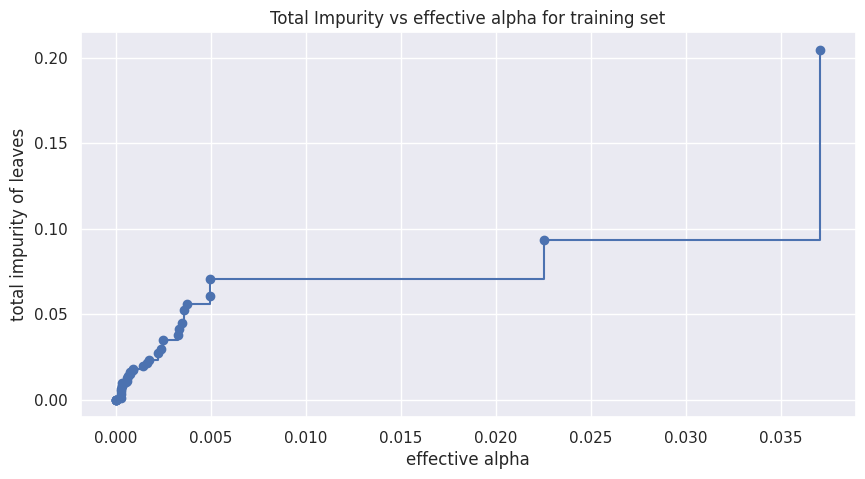

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2953792759992327


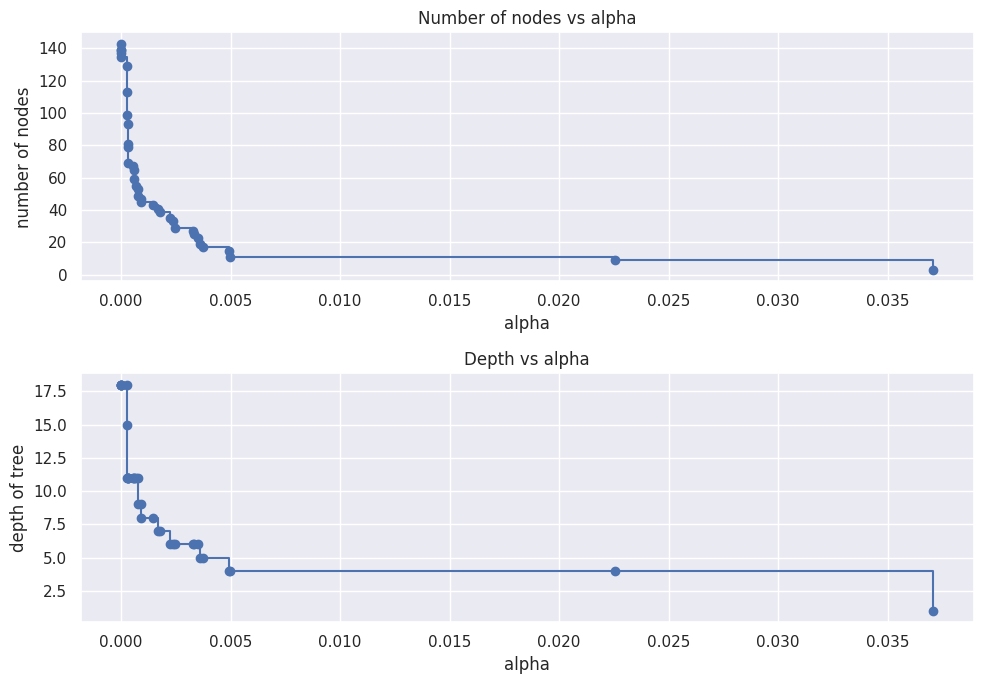

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [ ]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [ ]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

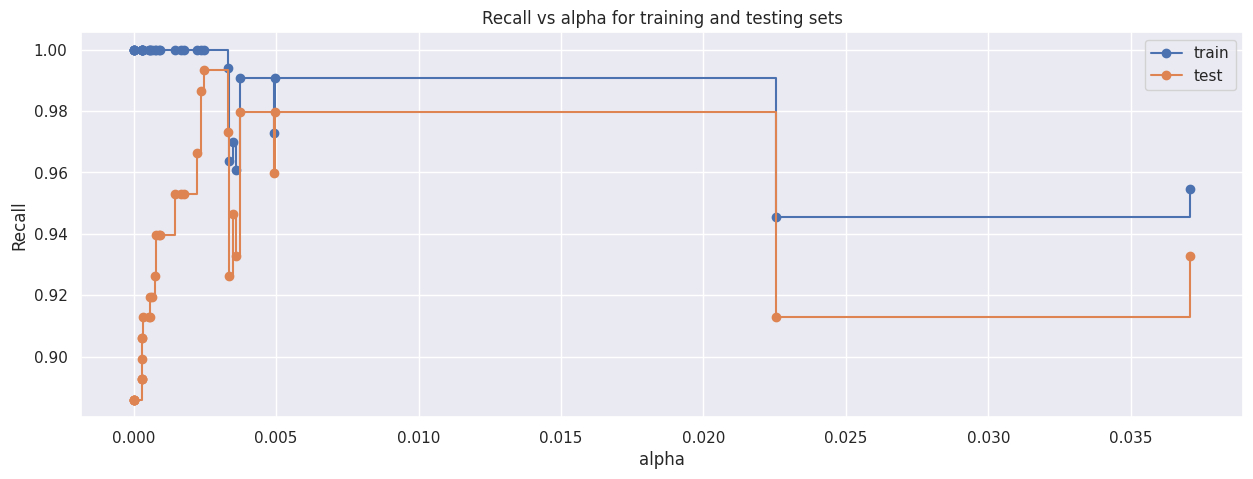

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0024726598786421958),
                       class_weight='balanced', random_state=1)


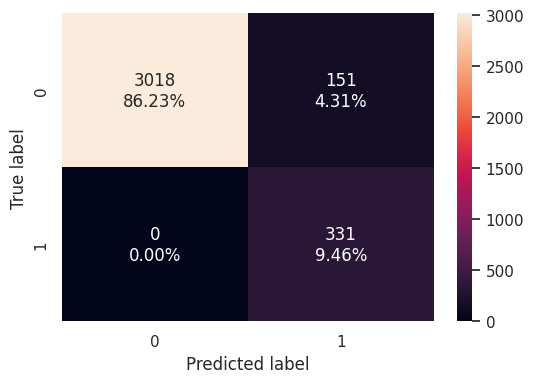

In [ ]:
model4 = best_model
confusion_matrix_sklearn(model4, X_train, y_train)

In [ ]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    model4, X_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.956857,1.0,0.686722,0.814268


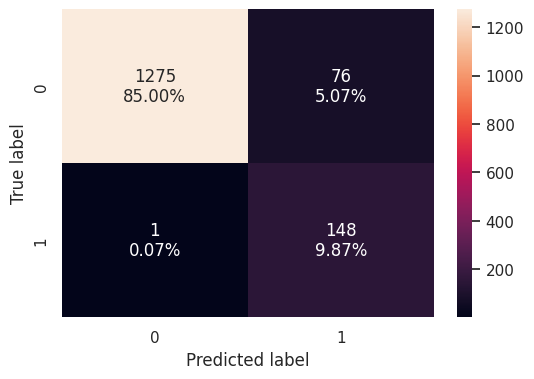

In [ ]:
confusion_matrix_sklearn(model4, X_test, y_test)

In [ ]:
decision_tree_post_test = model_performance_classification_sklearn(
    model4, X_test, y_test
)
decision_tree_post_test

,Accuracy,Recall,Precision,F1
0,0.948667,0.993289,0.660714,0.793566




- The model maintains **high accuracy and recall** on both training (95.7% accuracy, 100% recall) and test sets (94.9% accuracy, 99.3% recall), indicating it is effectively identifying most of the positive (loan-accepting) cases.

- However, the **precision is relatively low** on both sets (around 66–69%), suggesting the model also predicts many false positives — i.e., it often predicts a customer will take a loan when they won’t.

- The balanced **F1-score (~0.79–0.81)** indicates a reasonable trade-off between precision and recall, and the **small performance gap** between train and test suggests **good generalization** after pruning.

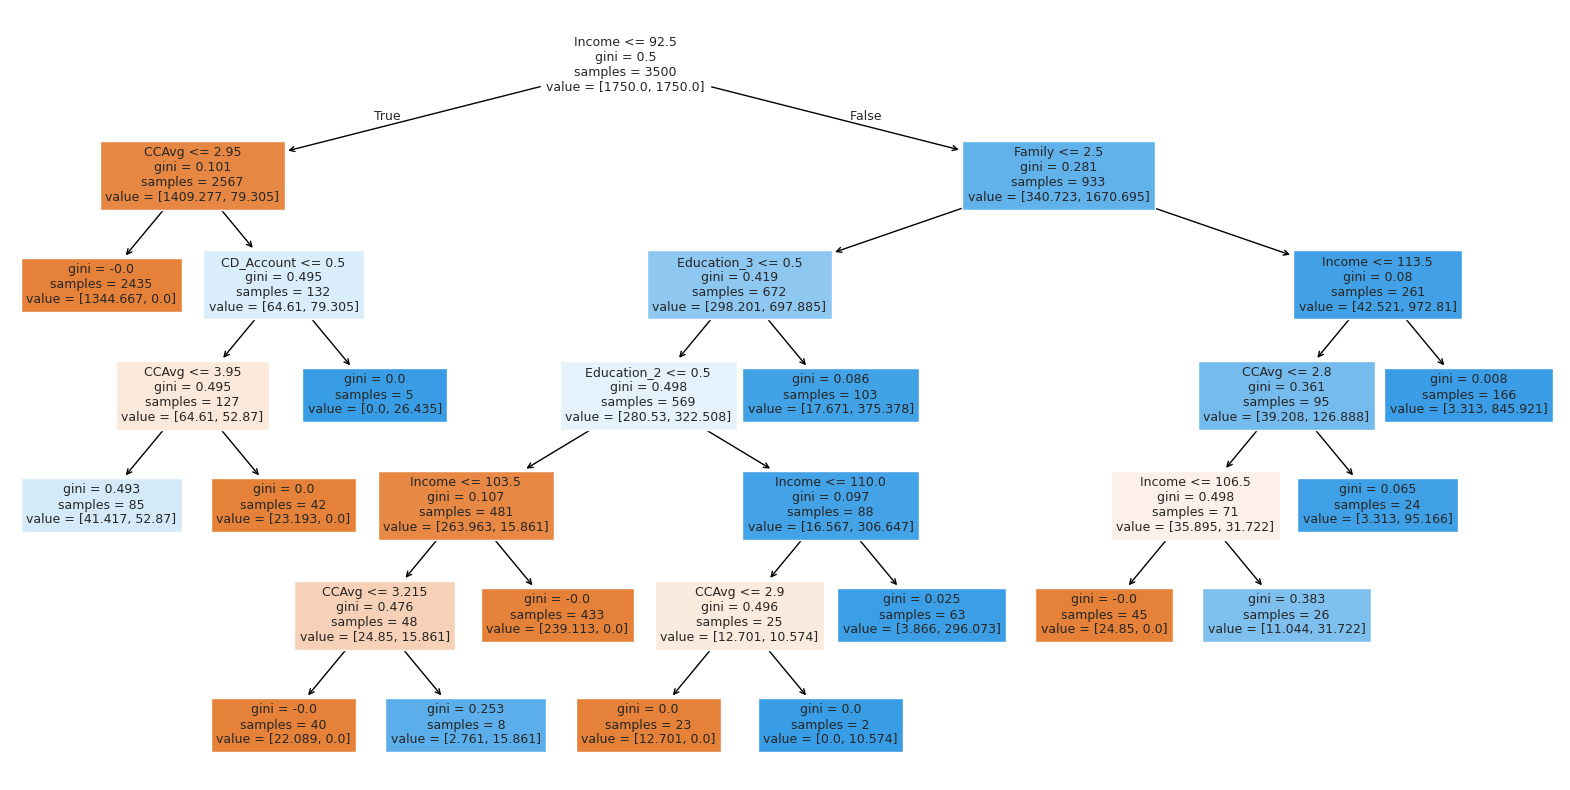

In [ ]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    model4,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model4, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- weights: [41.42, 52.87] class: 1
|   |   |   |--- CCAvg >  3.95
|   |   |   |   |--- weights: [23.19, 0.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [0.00, 26.44] class: 1
|--- Income >  92.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- Education_2 <= 0.50
|   |   |   |   |--- Income <= 103.50
|   |   |   |   |   |--- CCAvg <= 3.21
|   |   |   |   |   |   |--- weights: [22.09, 0.00] class: 0
|   |   |   |   |   |--- CCAvg >  3.21
|   |   |   |   |   |   |--- weights: [2.76, 15.86] class: 1
|   |   |   |   |--- Income >  103.50
|   |   |   |   |   |--- weights: [239.11, 0.00] class: 0
|   |   |   |--- Education_2 >  0.50
|   |   |   |   |--- Income <= 110.00
|   |   |   |   |   |--- CCAvg <= 2.90
|   |   |   |   |   |   |--- weights: [12

In [ ]:
importances = model4.feature_importances_
indices = np.argsort(importances)

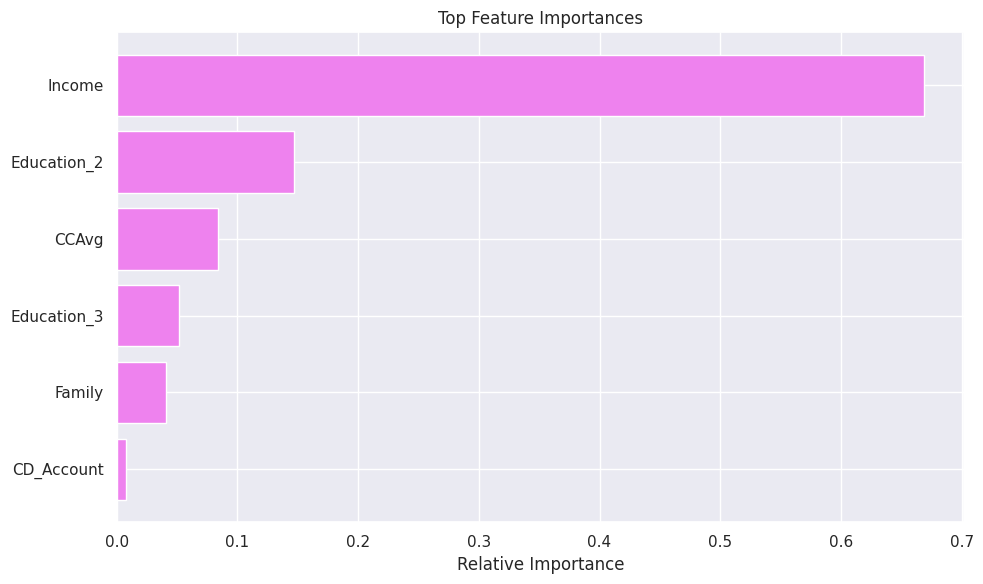

In [ ]:

# Get feature importances and match with feature names
importances = model4.feature_importances_
feature_importances = pd.Series(importances, index=X.columns)

# Keep only non-zero and top N important features
top_features = feature_importances[feature_importances > 0].sort_values(ascending=True).tail(15)

# Plot
plt.figure(figsize=(10, 6))
plt.title("Top Feature Importances")
plt.barh(top_features.index, top_features.values, color="violet")
plt.xlabel("Relative Importance")
plt.tight_layout()
plt.show()


- **Income** is by far the most influential feature in predicting personal loan acceptance, contributing to nearly **70% of the decision-making** in the model.

- Other features like **Education_2**, **CCAvg**, and **Education_3** also play a role, but their importance is much smaller in comparison to Income.

- Features like **Family** and **CD_Account** have minimal impact, suggesting that they contribute very little to the final decision in this pruned tree model.

## Model Performance Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_default_perf_train.T,
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree (sklearn default),Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,1.0,0.790286,0.956857
Recall,1.0,1.0,1.000000,1.000000
Precision,1.0,1.0,0.310798,0.686722
F1,1.0,1.0,0.474212,0.814268


In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_default_perf_test.T,
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree (sklearn default),Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.984000,0.975333,0.779333,0.948667
Recall,0.879195,0.885906,1.000000,0.993289
Precision,0.956204,0.868421,0.310417,0.660714
F1,0.916084,0.877076,0.473768,0.793566


- The **default** and **class-weighted decision trees** achieved **perfect performance on the training set**, indicating **overfitting**, while the **post-pruned tree** balanced generalization with strong training performance (F1 = 0.81).  
- On the **test set**, the **post-pruned tree** had the **highest recall (99.3%)**, making it best at identifying actual loan takers, with a good F1-score (0.79), showing it generalizes better.  
- The **pre-pruned tree** showed the **lowest precision and F1-score**, despite having 100% recall, indicating it **predicted many false positives**, making it less reliable overall.

 We Choose the Post-Pruned Decision Tree
It gives the best trade-off between overfitting and performance, excellent recall, and a decent F1-score on the test set.
Perfect for real-world deployment where generalization matters.

## Actionable Insights and Business Recommendations




**Actionable Insights:**


- Income is the strongest predictor of personal loan acceptance. Customers with higher incomes are significantly more likely to accept loan offers.

- Credit Card Usage (CCAvg) and Education Level also influence loan decisions, indicating financially aware and educated individuals may be more open to credit products.

- The post-pruned decision tree model generalizes well, offering high recall and balanced precision — making it reliable for targeting potential loan customers without overfitting.

- Features like Family size and CD account ownership have minimal predictive power and can be deprioritized in future modeling efforts.



What recommedations would you suggest to the bank?



**Business Recommendations:**

- Target high-income customers for personal loan marketing campaigns, especially those with moderate to high credit card usage and higher education levels.

- Use the post-pruned decision tree model in production to identify potential loan takers, ensuring a balance between outreach efficiency and prediction reliability.

- Optimize marketing spend by avoiding campaigns aimed at segments with low predictive influence (e.g., customers with CD accounts or larger families).

- Monitor model performance regularly, and retrain with updated data to ensure continued accuracy as customer behavior or economic conditions evolve.

- Consider integrating additional features (e.g., employment type, digital behavior) to further enhance the model’s predictive power.

___